In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
boston_data = pd.read_csv("BostonHousing.csv")

# Display the first few rows of the dataset
print(boston_data.head())

# Check for missing values
print(boston_data.isnull().sum())

# Summary statistics
print(boston_data.describe())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.6

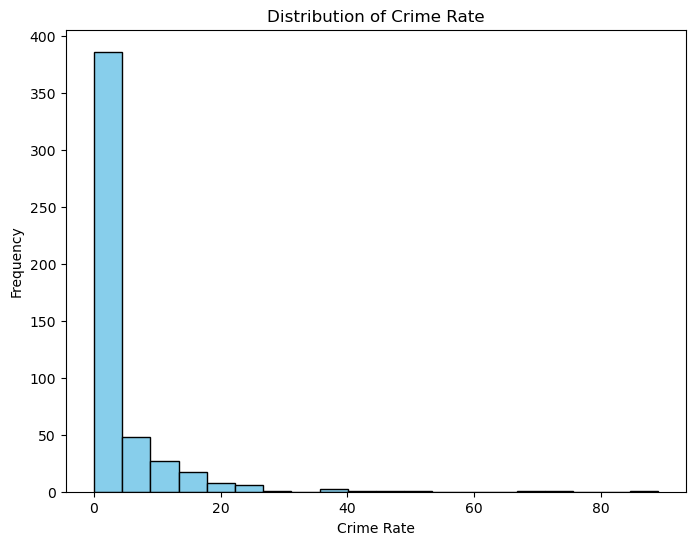

In [34]:
def plot_crime_rate_histogram(data, column_name, bins=20, color='skyblue', edge_color='black'):
    """
    Plot a histogram for the crime rate in the given dataset.

    Parameters:
        data (pandas.DataFrame): The dataset containing the crime rate data.
        column_name (str): The name of the column in the dataset that contains crime rate data.
        bins (int, optional): The number of bins to use for the histogram. Defaults to 20.
        color (str, optional): The color of the histogram bars. Defaults to 'skyblue'.
        edge_color (str, optional): The color of the histogram bar edges. Defaults to 'black'.

    Returns:
        None: This function does not return any value but displays a histogram.
    """
# Histogram of crime rate (crim)
plt.figure(figsize=(8, 6))
plt.hist(boston_data['crim'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Crime Rate')
plt.xlabel('Crime Rate')
plt.ylabel('Frequency')
plt.show()

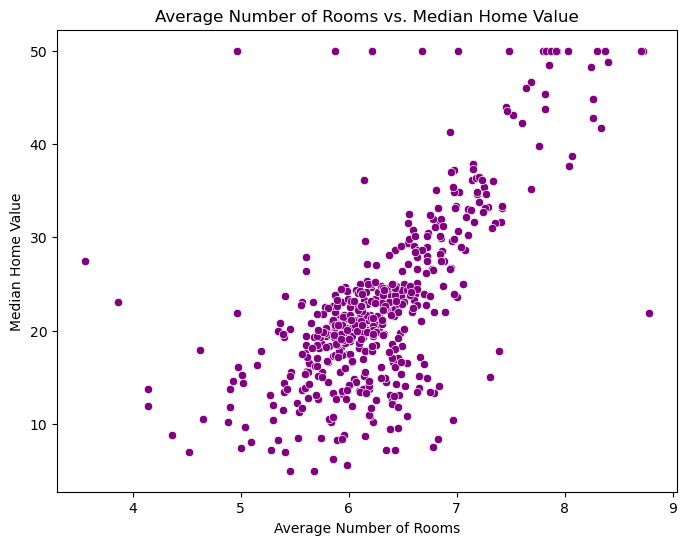

In [35]:
def plot_rooms_vs_value(data, x_column, y_column, color='purple'):
    """
    Plot a scatter plot of the average number of rooms against the median home value.

    Parameters:
        data (pandas.DataFrame): The dataset containing the housing data.
        x_column (str): The name of the column representing the average number of rooms per dwelling.
        y_column (str): The name of the column representing the median value of owner-occupied homes.
        color (str, optional): The color of the scatter plot points. Defaults to 'purple'.

    Returns:
        None: This function does not return any value but displays a scatter plot.
    """# Scatter plot of average number of rooms (rm) vs. median value of owner-occupied homes (medv)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rm', y='medv', data=boston_data, color='purple')
plt.title('Average Number of Rooms vs. Median Home Value')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Home Value')
plt.show()

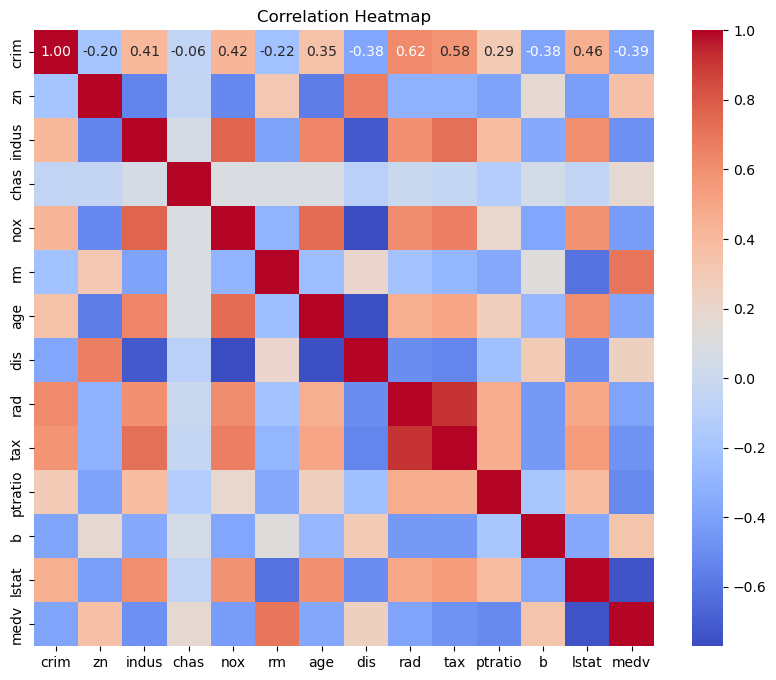

In [36]:
def plot_correlation_heatmap(data, cmap_style='coolwarm', annot_format='.2f'):
    """
    Generates a heatmap for the correlation matrix of the provided DataFrame.

    Parameters:
        data (pandas.DataFrame): The dataset for which the correlation matrix will be calculated and plotted.
        cmap_style (str, optional): The colormap style to be used for the heatmap. Defaults to 'coolwarm'.
        annot_format (str, optional): The formatting string for the annotations. Defaults to '.2f' (float with 2 decimal places).

    Returns:
        None: This function does not return any value but displays a heatmap.
    """
    # Create the heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(boston_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


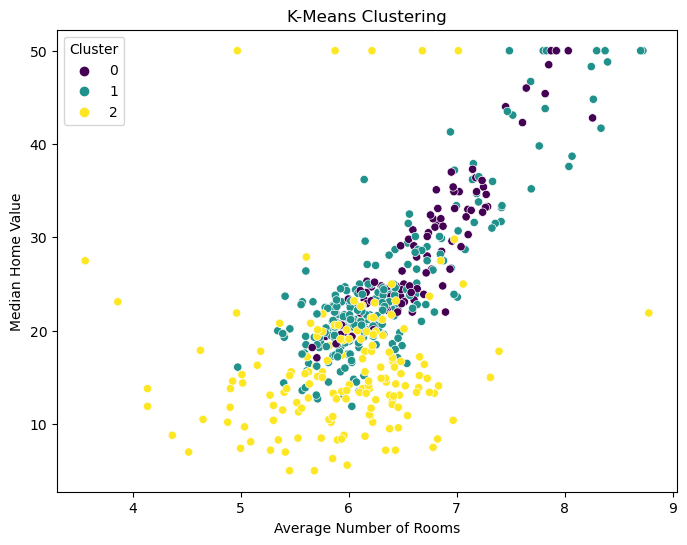

In [38]:
def perform_kmeans_clustering(data, feature_columns, target_column, n_clusters=3, random_state=42):
    """
    Performs K-Means clustering on the specified features of the dataset and visualizes the results using a scatter plot.

    Parameters:
        data (pandas.DataFrame): The dataset on which clustering will be performed.
        feature_columns (list): A list of column names to be used as features for clustering.
        target_column (str): The name of the target column for visualization.
        n_clusters (int, optional): The number of clusters to form. Defaults to 3.
        random_state (int, optional): A seed used by the random number generator for reproducibility. Defaults to 42.

    Returns:
        pandas.DataFrame: The modified DataFrame with an additional 'Cluster' column representing cluster assignments.
    """
X = boston_data.drop(columns=['medv', 'Cluster'], errors='ignore')  # Adjust column names as necessary

# Imputer instance
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the dataset
X_imputed = imputer.fit_transform(X)

# Data Preprocessing: Standardize features after imputation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Fit k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
boston_data['Cluster'] = kmeans.labels_

# Visualize clustering results (scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rm', y='medv', hue='Cluster', data=boston_data, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Home Value')
plt.show()


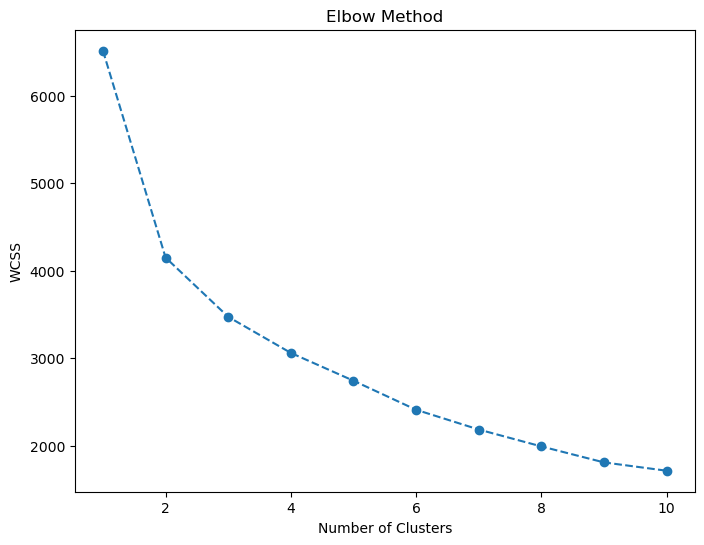

In [39]:
def plot_elbow_method(wcss, max_clusters=10):
    """
    Plots the elbow method from the within-cluster sums of squares (WCSS) list to help determine the optimal number of clusters for K-means clustering.

    Parameters:
        wcss (list): A list containing the within-cluster sums of squares values for different numbers of clusters.
        max_clusters (int, optional): The maximum number of clusters that were tested. Defaults to 10.

    Returns:
        None: The function plots the elbow graph and does not return any values.
    """
# Elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

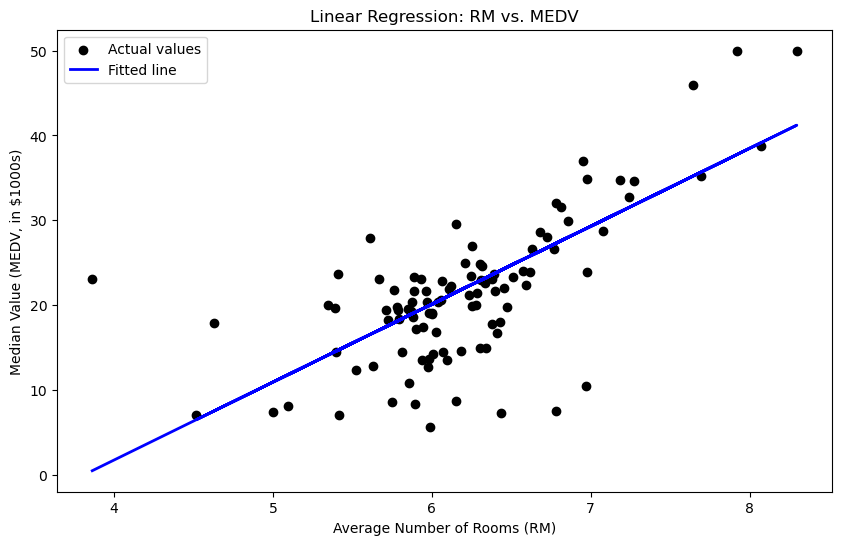

In [40]:
def linear_regression_with_imputation(data, feature_column, target_column, test_size=0.2, random_state=42):
    """
    Cleans data by dropping rows with NaN values in specified columns, imputes missing values, 
    performs linear regression, and visualizes the results with a scatter plot and fitted line.

    Parameters:
        data (pandas.DataFrame): The DataFrame containing the dataset.
        feature_column (str): The name of the column to be used as the feature (predictor).
        target_column (str): The name of the column to be used as the target (response).
        test_size (float, optional): The proportion of the dataset to include in the test split. Defaults to 0.2.
        random_state (int, optional): The seed used by the random number generator for reproducibility. Defaults to 42.

    Returns:
        model (sklearn.linear_model.LinearRegression): The trained linear regression model.
    """
# Drop rows where any row contains NaN in 'rm' or 'medv'
boston_data = boston_data.dropna(subset=['rm', 'medv'])

# Proceed with your existing code for feature selection
X = boston_data[['rm']]
y = boston_data['medv']
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy of mean
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the 'rm' column
boston_data['rm'] = imputer.fit_transform(boston_data[['rm']])

# Assuming no missing values in 'medv', but if there are, apply imputation similarly
boston_data['medv'] = imputer.fit_transform(boston_data[['medv']])

# Proceed with your existing code for feature selection
X = boston_data[['rm']]
y = boston_data['medv']
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual values')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Fitted line')
plt.title('Linear Regression: RM vs. MEDV')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value (MEDV, in $1000s)')
plt.legend()
plt.show()
